# Local Binary Pattern

Local Binary Pattern (LBP) is a simple yet very efficient texture operator which labels the pixels of an image by thresholding the neighborhood of each pixel and considers the result as a binary number. Due to its discriminative power and computational simplicity, LBP texture operator has become a popular approach in various applications. It can be seen as a unifying approach to the traditionally divergent statistical and structural models of texture analysis. Perhaps the most important property of the LBP operator in real-world applications is its robustness to monotonic gray-scale changes caused, for example, by illumination variations. Another important property is its computational simplicity, which makes it possible to analyze images in challenging real-time settings.

In [1]:
# import library
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2

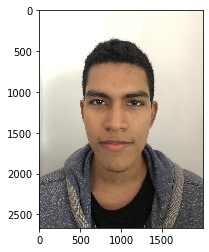

In [2]:
face = mpimg.imread("img/coloredDataSet/1-1.jpg")
img_face = np.asarray(face)
plt.imshow(face)

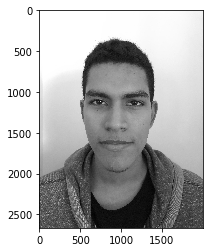

In [3]:
gray = cv2.cvtColor(face, cv2.COLOR_RGB2GRAY)
imgplot = plt.imshow(gray, cmap='gray')

(array([ 288967.,  291347.,  472003.,  522645.,  555139.,  478987.,
         263965.,  430697.,  690576., 1337674.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

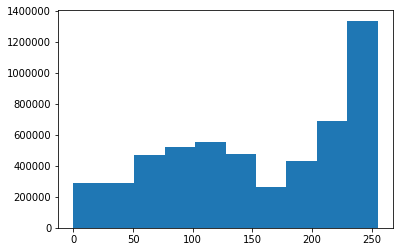

In [4]:
plt.hist(gray.ravel())

In [5]:
def neighbours(x, y, radius, numNeighbours):
    neighbour = []
    
    for i in range(0,numNeighbours):
            
        t = (2 * math.pi * i) / numNeighbours;

        neighbourX = round(x + radius * math.cos(t));
        neighbourY = round(y - radius * math.sin(t));

        nPoint = [neighbourX,neighbourY]
        neighbour.append(nPoint);
            
    return neighbour

In [33]:
def middlepointValue(x, y, radius, numNeighbours):
    
    neighbours_list = neighbours(x, y, radius, numNeighbours)
    
    sum = 0;
    i = 0;
    
    for point in neighbours_list:
    
        aux = 0;
            
        if (gray[x][y]>=gray[point[0]][point[1]]):
            aux=1 
        
        if (aux == 1):
            sum += math.pow(2,i);
            
        i+=1
        
    return sum

In [39]:
def lbp(radius,numNeighbours,img):
    
    lbp_img = img
    
    width = len(img)
    height = len(img[0])
    
    for x in range(radius,(width-radius)):
        for y in range(radius,(height-radius)):
            
            if(x<width-radius and y<height-radius):
                value = middlepointValue(x, y, radius, numNeighbours);

                if (value > 255):
                    value = value / 256;

                lbp_img[x][y] = value
    
    return lbp_img

Width ========> 2666
height =======> 2000


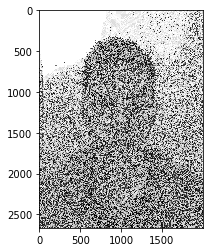

In [8]:
lbp_result = lbp(2,8,gray)

width = len(lbp_result)
height = len(lbp_result[0]) 

print("Width ========> %a"%(width))
print("height =======> %a"%(height))

imgplot = plt.imshow(lbp_result, cmap='gray')

In [9]:
def splitImage(lbp_img):
        
    listHistograms = [{},{},{},{}]
    

    width = len(lbp_img)
    height = len(lbp_img[0])
    
    for i in range (0,256):
        listHistograms[0][i]=0
        listHistograms[1][i]=0
        listHistograms[2][i]=0
        listHistograms[3][i]=0
        
    for x in range(0,width):
        for y in range(0,height):
                
            if (y <= height/2 and x <= width/2):
                    
                if lbp_img[x][y] in listHistograms[0]:
                    listHistograms[0][lbp_img[x][y]] += 1
                    
            elif (y > height / 2 and x <= width / 2):
                    
                if lbp_img[x][y] in listHistograms[1]:
                    listHistograms[1][lbp_img[x][y]] += 1
                    
            elif (y <= height / 2 and x > width / 2):
                    
                if lbp_img[x][y] in listHistograms[2]:
                    listHistograms[2][lbp_img[x][y]] += 1
                    
            elif (y > height/2 and x > width/2):
                    
                if lbp_img[x][y] in listHistograms[3]:
                    listHistograms[3][lbp_img[x][y]] += 1
                           
    return listHistograms;

In [10]:
data = splitImage(lbp_result)

total = 0;
for i in range (0,256):
    num = data[0][i]+data[1][i]+data[2][i]+data[3][i]
    print("num: {0} ====> {1}".format(i,num))
    total += num

print (total)

num: 0 ====> 77805
num: 1 ====> 14274
num: 2 ====> 23729
num: 3 ====> 16728
num: 4 ====> 18770
num: 5 ====> 4421
num: 6 ====> 4821
num: 7 ====> 4212
num: 8 ====> 16856
num: 9 ====> 4697
num: 10 ====> 11694
num: 11 ====> 12085
num: 12 ====> 8562
num: 13 ====> 2331
num: 14 ====> 4493
num: 15 ====> 5061
num: 16 ====> 46122
num: 17 ====> 9718
num: 18 ====> 19025
num: 19 ====> 14769
num: 20 ====> 20559
num: 21 ====> 5752
num: 22 ====> 5932
num: 23 ====> 5534
num: 24 ====> 19734
num: 25 ====> 5976
num: 26 ====> 18188
num: 27 ====> 23505
num: 28 ====> 15095
num: 29 ====> 4720
num: 30 ====> 11918
num: 31 ====> 15285
num: 32 ====> 97486
num: 33 ====> 19828
num: 34 ====> 36027
num: 35 ====> 29252
num: 36 ====> 43829
num: 37 ====> 10087
num: 38 ====> 9605
num: 39 ====> 9188
num: 40 ====> 23468
num: 41 ====> 6356
num: 42 ====> 17491
num: 43 ====> 19335
num: 44 ====> 20616
num: 45 ====> 5916
num: 46 ====> 9282
num: 47 ====> 11264
num: 48 ====> 46258
num: 49 ====> 10979
num: 50 ====> 19768
num: 51 =

# Training

In [29]:
def distance(matrixA,matrixB):
    
    chi = 0
    
    for i in range(0,len(matrixA)):
        for j in range(0,len(matrixA[0])):
            suma = matrixA[i][j] + matrixB[i][j]
            resta = matrixA[i][j] - matrixB[i][j]
            
            if resta == 0:
                chi += 0
            else:
                chi += math.pow(resta,2)/suma
    
    return chi

In [40]:
studioSubject = None

for i in range(1,5):
    for j in range(1,3):
        
        face = mpimg.imread("img/coloredDataSet/{0}-{1}.jpg".format(i,j))
        subject = cv2.cvtColor(face, cv2.COLOR_RGB2GRAY)
        matrix = splitImage(lbp(2,8,subject))
        
        if (i== 1 and j == 1):
            studioSubject = matrix
        else:
            relationship = distance(studioSubject, matrix);
            print("1-1 vs {0}-{1} ==> {2}".format(i,j,relationship));

1-1 vs 1-2 ==> 544.840218859477
1-1 vs 2-1 ==> 296.15733166170975
1-1 vs 2-2 ==> 323.35200776230107
1-1 vs 3-1 ==> 396.76541988037815
1-1 vs 3-2 ==> 328.7875976415406
1-1 vs 4-1 ==> 364.9501271688826
1-1 vs 4-2 ==> 306.57862066281695
